# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [20]:
import pandas as pd
import numpy as np
import os
import glob


In [21]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [ ]:
# Write your answer here

### Method to extract the data from several csv files and concatenate them

In [ ]:
def extraction_ebola(directory_name, country_name):
    
    files = [fn for fn in glob.glob(directory_name)]
    df_from_each_file = (pd.read_csv(f) for f in files)
    df = pd.concat(df_from_each_file, ignore_index=True)

    ##### Adding the Country name to the data frame
    country = [country_name] * len(df)
    country_df = pd.DataFrame({'country': country})
    df.join(country_df)
    
    return df
    

### Extract data of each country

In [ ]:
guinea_df = extraction1('Data/ebola/guinea_data/*', 'Guinea')
liberia_df = extraction1('Data/ebola/liberia_data/*', 'Liberia')
sierra_leone_df = extraction1('Data/ebola/sl_data/*', 'Sierra Leone')


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

### Extraction of the spreadsheets

This method extract the data from the nine excel sheets and create a DataFrame from them. It also return nine DataFrames, one for each spreadsheet. They are used to determine the number of element in each spreadsheets when the metadata are added

In [30]:
def extraction_microbiome(directory_name, exclude_file):
    
    files = [fn for fn in glob.glob(directory_name) if not os.path.basename(fn).startswith(exclude_file)]
    data_frames = []

    for f in files:
        data_frames.append(pd.read_excel(f, names = ['TAXON', 'COUNT'])) 
    
    df = pd.concat([d for d in data_frames])
    
    #Reset the indexes to avoid duplicates. This create a column named 'index' that we don't need so its deleted
    df = df.reset_index()
    del df['index']
    
    return df, data_frames

In [31]:
taxon_df, taxon_data_frames = extraction_microbiome(DATA_FOLDER+'/microbiome/*.xls', 'metadata')


The metadata are extracted, and duplicated to match the size of our DataFrame

In [32]:
metadata = pd.read_excel(DATA_FOLDER+'/microbiome/metadata.xls')
meta = []
for i in range(0, len(metadata)):
    for j in range(0, len(taxon_data_frames[i])):
        meta.append(metadata.values[i])

A DataFrame containing the metadata is created and is concatenated to the Taxon DataFrame. The Nan values are replaced by 'unknown'

In [33]:
meta_df = pd.DataFrame(meta, columns=['BARCODE', 'GROUP', 'SAMPLE'])
result = pd.concat([taxon_df, meta_df], axis=1)
result = result.fillna('unknown');
result

,TAXON,COUNT,BARCODE,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,unknown
1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,unknown
2,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,unknown
3,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,unknown
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
6,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
8,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1,EXTRACTION CONTROL,unknown
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",4,MID1,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

#### 1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 

In [34]:
titanicData = pd.read_excel(DATA_FOLDER+'/titanic.xls')
titanicData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Attributes that can be Categorical :
- survived
- sex -> transform sex attribut (female=0 male=1)
- age
- embarked
- boat

In [6]:
# Change sex attribut to a categorical attribut

titanicData['sex'] = titanicData['sex'].replace('female', 0)
titanicData['sex'] = titanicData['sex'].replace('male', 1)

titanicData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# La question qu'on doit se poser: Qu'est-ce qu'on fait avec les ages? Est-ce qu'on supprime tous les passagers qui n'ont pas d'age? Est-ce qu'on arrondi ceux qui on un age qui n'est pas un 'int'? Est-ce qu'on enlève ceux qui ont un age du style '0.89983' ou on les ignores seulements pour les graph? Tout ceux qui ont des ages <1 sont des enfants de moins d'un an en fait.

In [38]:
# Round age attribute
# Question: Est-ce qu'on enlève les ages qui ne sont pas des int ou est-ce qu'on les arrondi?
titanicData['age'] = titanicData['age'].round()
titanicData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,45.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,45.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

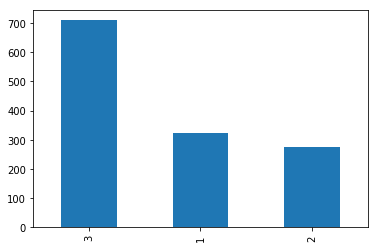

In [7]:
# Histograms for travel class attributes

df = titanicData.pclass.astype('category')
df.value_counts().plot(kind='bar')

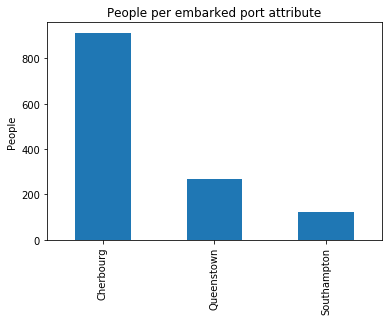

In [8]:
# Histograms for embarkation port attributes (Cherbourg Queenstown Southampton)

df = titanicData.embarked.astype('category')
embarkedPlot = df.value_counts().plot(kind='bar')
embarkedPlot.set_title("People per embarked port attribute")
embarkedPlot.set_ylabel("People")
embarkedPlot.set_xticklabels(["Cherbourg", "Queenstown", "Southampton"])

[<matplotlib.text.Text at 0x117849ba8>, <matplotlib.text.Text at 0x11784f1d0>]

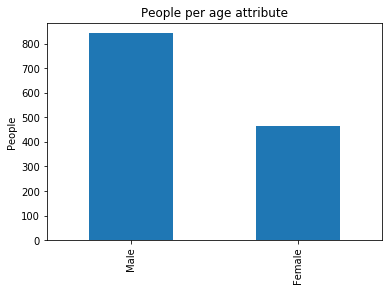

In [9]:
# Histograms for sex attributes

df = titanicData.sex.astype('category')
sexPlot = df.value_counts().plot(kind='bar')
sexPlot.set_title("People per age attribute")
sexPlot.set_ylabel("People")
sexPlot.set_xticklabels(["Male", "Female"])

In [ ]:
# Histogram for age attributes with discrete intervals ([0,10])

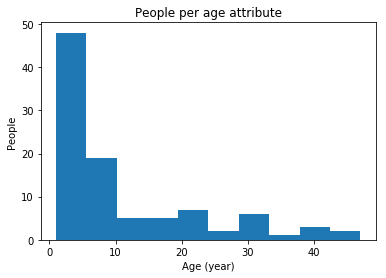

In [10]:
# Histograms for age attributes

df = titanicData.age.astype('category')
agePlot = df.value_counts().plot(kind='hist')
agePlot.set_title("People per age attribute")
agePlot.set_ylabel("People")
agePlot.set_xlabel("Age (year)")

#### 3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

In [11]:
# On vire les NAN values
cabinFloor = titanicData.dropna(subset = ['cabin']).reset_index(drop = True).cabin

# On garde juste la 1er lettre qui représente le floor ce qui nous intéresse. Ptete une meilleur manière de faire
for i in range(len(cabinFloor)):
    cabinFloor[i] = list(cabinFloor[i])[0]

cabinFloor.value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: cabin, dtype: int64

Problèmes :
- quasiment pas de cabin pour la 3ème classe
- est-ce qu'on devrait pas juste garder la première classe ? et faire le pie chart avec ça ?

#### 4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

In [12]:
nbSurvivors = np.zeros(3,)
    
for pclass in range(1,4):
    nbSurvivors[pclass-1] = titanicData.query('pclass == @pclass').query('survived == 1').shape[0]

print("number of survivors : ", nbSurvivors)

number of survivors :  [ 200.  119.  181.]


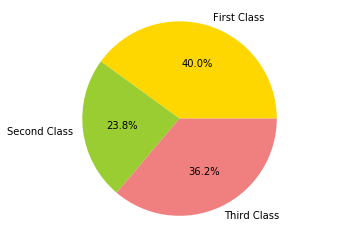

In [13]:
labels = 'First Class', 'Second Class', 'Third Class'
colors = ['gold', 'yellowgreen', 'lightcoral']

plt.pie(nbSurvivors,labels=labels, colors=colors,autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

#### 5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

In [14]:
nbSurvivors = np.zeros((3,2))
    
for pclass in range(1,4):
    for gender in range(2):
        nbSurvivors[pclass - 1, gender] = titanicData.query('pclass == @pclass').query('sex == @gender').query('survived == 1').shape[0]

print("number of survivors [female][male]: \n", nbSurvivors)

np.arange(nbSurvivors.shape[0])


number of survivors [female][male]: 
 [[ 139.   61.]
 [  94.   25.]
 [ 106.   75.]]


array([0, 1, 2])

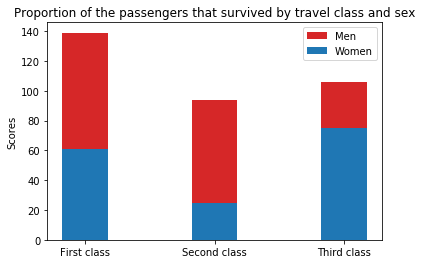

In [15]:
ind = np.arange(nbSurvivors.shape[0])
width = 0.35       

p1 = plt.bar(ind, nbSurvivors[:,0], width, color='#d62728')
p2 = plt.bar(ind, nbSurvivors[:,1], width,)

plt.ylabel('Scores')
plt.title('Proportion of the passengers that survived by travel class and sex')
plt.xticks(ind, ('First class', 'Second class', 'Third class'))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()


#### 6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

J'ai supprimé toutes les lignes où un survivant n'avait pas d'âge, je vois pas trop comment faire en sorte de récupérer ces données proprement.

In [16]:
def survivals_proportions(data):

    ratioClass, ratioSex, nb = np.zeros(3), np.zeros(2), int(data.shape[0]/2)

    # Survival proportions by age category 
    ratioAge = data.query('survived == 1').shape[0]/nb # nb people alive / nb people total
    
    # Survival proportions by travel class
    for pclass in range(1,4):
        nb = data[data.pclass == pclass].shape[0]
        ratioClass[pclass-1] = data.query('pclass == @pclass').query('survived == 1').shape[0]/nb

    # Survival proportions by sex
    for sex in range(2):
        nb = data[data.sex == sex].shape[0]
        ratioSex[sex] = data.query('sex == @sex').query('survived == 1').shape[0]/nb
                      
    return ratioAge, ratioClass, ratioSex

In [17]:
# Keep only people who's don't have nan value for age and sort datafram by age
titanicDataClean = titanicData.dropna(subset = ['age']).sort_values(['age'])

nb = int(titanicDataClean.shape[0]/2)

ratioAge, ratioClass, ratioSex = np.zeros(2), np.zeros((2,3)), np.zeros((2,2))

# First age category
ratioAge[0], ratioClass[0,:], ratioSex[0,:] = survivals_proportions(titanicDataClean.head(nb))

# Second age category
ratioAge[1], ratioClass[1,:], ratioSex[1,:] = survivals_proportions(titanicDataClean.tail(nb))

In [18]:
# Datafram creation

data = pd.DataFrame({'Age categorie':['1er','2nd'], 
                     'Ratio Age':ratioAge,
                     'First Class':ratioClass[:,0],
                     'Second Class':ratioClass[:,1],
                     'Third Class':ratioClass[:,2],
                     'Female':ratioSex[:,0],
                     'Male':ratioSex[:,1]})

# Data reorganization
data = data[['Age categorie','Ratio Age','First Class','Second Class','Third Class','Female','Male']]
data.T

,0,1
Age categorie,1er,2nd
Ratio Age,0.823755,0.812261
First Class,0.760563,0.596244
Second Class,0.516129,0.372263
Third Class,0.295732,0.196532
Female,0.707921,0.801075
Male,0.224299,0.186944


In [19]:
# Is the index unique ?
data.index.is_unique

True

#### Discussion

- De manière général, plus d'hommes sont mort (stratégie "les femmes et les enfants d'abords" ?). 
- Dans la première classe, il y a également un taux de survie plus haut : les riches avaient accès à plus de bateau de sauvetage ?
- On voit pas de diff différance vraiment notable entre les deux classe d'age, surement à cause du fait que trop de personnes sont autour de la moyenne : plein de gens d'environ 28 ans sont dans les deux classes -> ça nique l'interprétation qu'on peut faire des données.

(- Pensez à vérifiez qu'on les bonne données)